**Name** : Bodhisatya Ghosh \
**Class** : CSE DS \
**UID** : 2021700026 \
**Subject** : ML \
**Experiment number** : 1

In [206]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [207]:
df = pd.read_csv('./salaries_final.csv')
df.head(1)

,Year,Name,Primary Job Title,Base Pay,Department,College
0,2010,"Abaied, Jamie L.",Assistant Professor,64000.0,Department of Psychological Science,CAS


In [208]:
df.drop(columns=['Name'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14470 entries, 0 to 14469
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               14470 non-null  int64  
 1   Primary Job Title  14470 non-null  object 
 2   Base Pay           14470 non-null  float64
 3   Department         14470 non-null  object 
 4   College            14470 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 565.4+ KB


In [209]:
df['College'].value_counts()

College
COM                       6723
CAS                       3692
CEMS                       869
CALS                       793
CESS                       770
CNHS                       601
RSENR                      437
Business                   318
Library                    171
Department of Ext           74
LCOMEO                      12
Learning and Info Tech      10
Name: count, dtype: int64

In [210]:
collegeMedSal = pd.DataFrame(df.groupby(by='College')['Base Pay'].median()).reset_index()
collegeMedSal

,College,Base Pay
0,Business,146060.50
1,CALS,76448.22
2,CAS,76072.50
3,CEMS,85267.00
4,CESS,66939.00
5,CNHS,65000.00
6,COM,40000.00
7,Department of Ext,101627.50
8,LCOMEO,5727.00
9,Learning and Info Tech,72942.00


<Axes: xlabel='College', ylabel='Base Pay'>

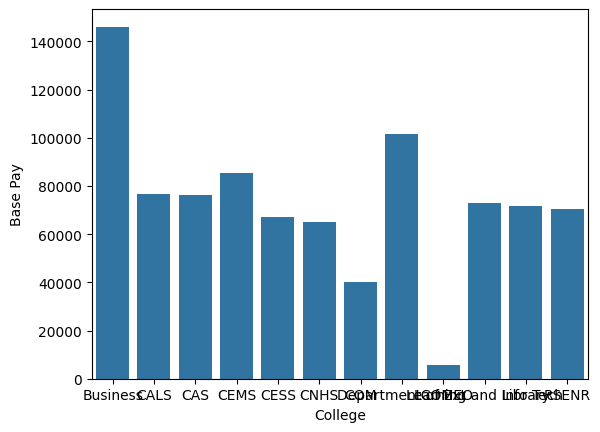

In [211]:
sns.barplot(data=collegeMedSal,x = collegeMedSal['College'], y = collegeMedSal['Base Pay'])

In [212]:
jobMedSal = pd.DataFrame(df.groupby(by='Primary Job Title')['Base Pay'].median()).reset_index()
jobMedSal

,Primary Job Title,Base Pay
0,Academic Srvcs Professional,35830.0
1,Academic Srvcs Professional Sr,53207.5
2,Academic Srvcs Professonal Sr,62276.0
3,Acting Director,87125.0
4,Acting Director Dana Medical Library,111450.0
...,...,...
142,VP Research,265753.5
143,Vice Pres for Enrollment Mgmnt,209589.5
144,Visiting Assistant Prof,55116.0
145,Visiting Instructor,62076.5


#### As there are too many distinct job titles, using this variable as a categorical independent variable will increase dimensionality too much and will not be of use in analysis

In [213]:
# df.drop(columns=['Primary Job Title'], inplace=True)
# df.info()

In [214]:
departmentMedSal = pd.DataFrame(df.groupby(by='Department')['Base Pay'].median()).reset_index()
departmentMedSal

,Department,Base Pay
0,Department of Anesthesiology,30000.000
1,Department of Animal and Veterinary Sciences,74313.595
2,Department of Anthropology,76892.000
3,Department of Art & Art History,64193.000
4,Department of Asian Languages & Literatures,58917.965
...,...,...
104,Department of Surg-Vascular,35000.000
105,Department of Surgery,93967.500
106,Department of Theatre and Dance,70473.000
107,Grossman School of Business,146060.500


<Axes: xlabel='Department', ylabel='Base Pay'>

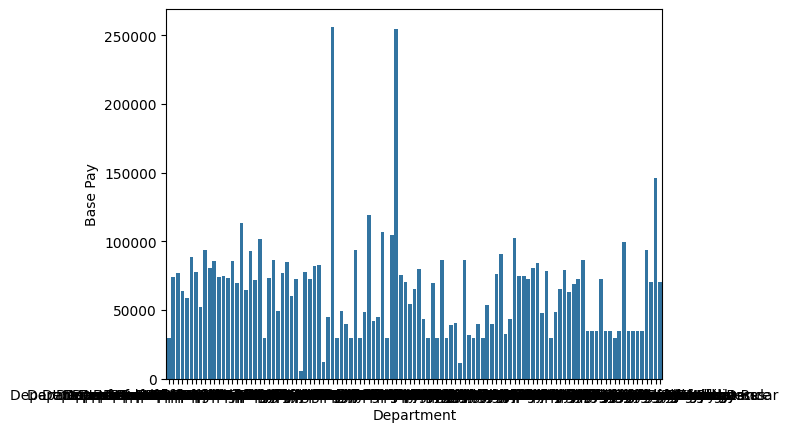

In [215]:
sns.barplot(data=departmentMedSal,x = departmentMedSal['Department'], y = departmentMedSal['Base Pay'])

In [216]:
YearMedSal = pd.DataFrame(df.groupby(by='Year')['Base Pay'].median()).reset_index()
YearMedSal

,Year,Base Pay
0,2009,63290.0
1,2010,66101.0
2,2011,61000.0
3,2012,63259.0
4,2013,64280.0
5,2014,66574.5
6,2015,64985.0
7,2016,64946.0
8,2017,61920.0
9,2018,63314.0


<Axes: xlabel='Year', ylabel='Base Pay'>

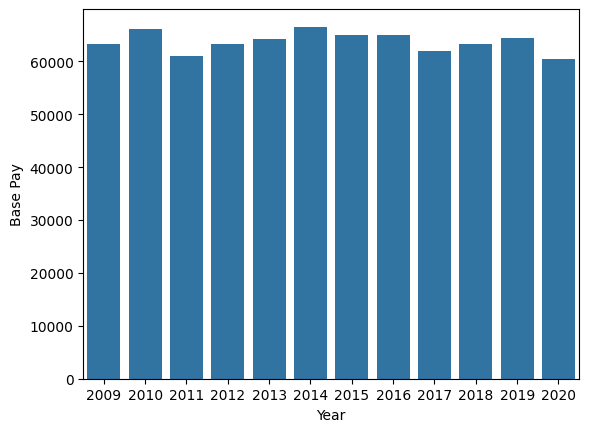

In [217]:
sns.barplot(data=YearMedSal,x = YearMedSal['Year'], y = YearMedSal['Base Pay'])

In [218]:
encodedDf = df.copy()
encodedDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14470 entries, 0 to 14469
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               14470 non-null  int64  
 1   Primary Job Title  14470 non-null  object 
 2   Base Pay           14470 non-null  float64
 3   Department         14470 non-null  object 
 4   College            14470 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 565.4+ KB


In [219]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [220]:
encodedDf['College'] = le.fit_transform(encodedDf['College'])
encodedDf['Department'] = le.fit_transform(encodedDf['Department'])
encodedDf['Primary Job Title'] = le.fit_transform(encodedDf['Primary Job Title'])
encodedDf.corr()

,Year,Primary Job Title,Base Pay,Department,College
Year,1.000000,-0.002705,0.011595,0.003409,0.058346
Primary Job Title,-0.002705,1.000000,0.233902,-0.034217,-0.113989
Base Pay,0.011595,0.233902,1.000000,-0.005764,-0.209479
Department,0.003409,-0.034217,-0.005764,1.000000,0.222608
College,0.058346,-0.113989,-0.209479,0.222608,1.000000


<Axes: >

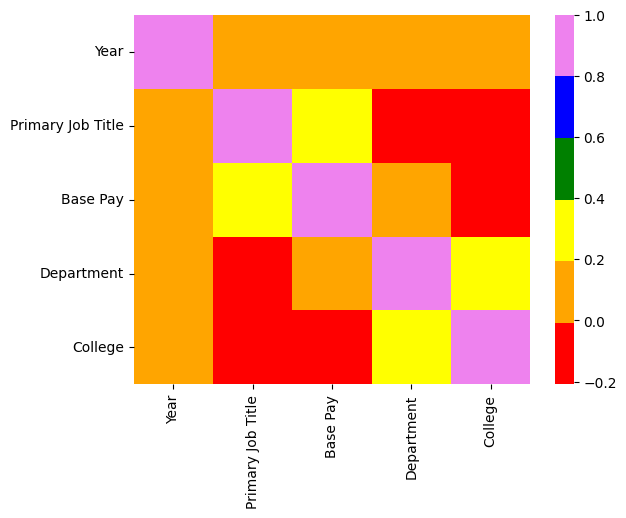

In [221]:
sns.heatmap(encodedDf.corr(), cmap=['red','orange','yellow','green','blue','violet'])